# Outlier Analysis
### What is Outliers?
- Outliers is defined as data points which are away from the distribution of majority data points which can be extrem low or extrem high.
### Reason for exsistens of Outliers:
- **Reasons**
  1. Data Entry Error
     - Human Error. 
  2. Measurement Error
     - Mixed Units in columns.
  3. Instrument Error
     - Ex: Sensor Error.
  4. Rare Event
     - happens very infrequently.
     - Ex: Valentine's day, Big Billion days......etc
### Identification of Outliers:
1. Non-Viz
    - IQR
    - Z-score
2. Viz
   - Box Plot
   - Scatter Plot
3. Domain Knowledge
   - Experience about the specific domain.
   - Terms
4. Hypothesis Testing
   - Grubb's Test
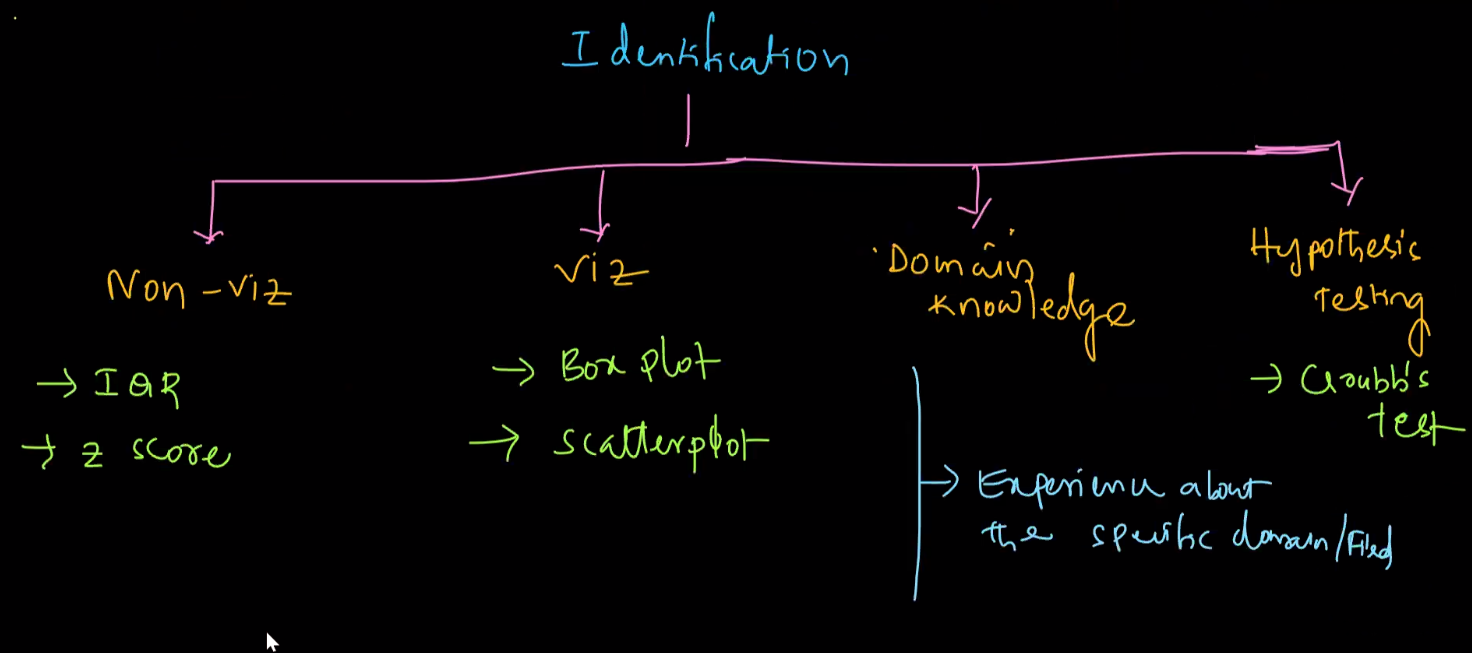

### Impact Of Outliers:
- It influence the statistical analysis.
- Outliers influence the machine learning models/algorithms.
  - Ex: distance, KNN, Linear Regression

### Treatement
- **Remove / Trimming**(❌) (Not Recomended)
  - When we remove
         - System glitches, Data Entry Error
- **Replace / Capping**
   - When we replace
           - Domain Knowledge
           - Statistical
           - Winsorization
- **Retain / Rare Events**
   - When we retain
          - Rare Event

In [1]:
import pandas as pd

## Identification

In [8]:
df = pd.DataFrame({
    "Marks":[23,15,94,32,16,64,76,300,65,66,47]
})

<Axes: >

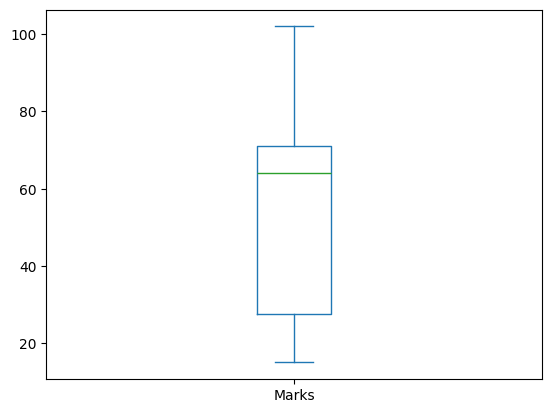

In [7]:
df['Marks'].plot(kind = 'box')

## Treatment
### Trimming

In [10]:
pip install feature_engine

  Using cached pandas-2.2.2-cp311-cp311-win_amd64.whl.metadata (19 kB)
   ---------------------------------------- 0.0/357.1 kB ? eta -:--:--
   --- ------------------------------------ 30.7/357.1 kB ? eta -:--:--
   --- ------------------------------------ 30.7/357.1 kB ? eta -:--:--
   -------- ------------------------------ 81.9/357.1 kB 657.6 kB/s eta 0:00:01
   ---------- ---------------------------- 92.2/357.1 kB 581.0 kB/s eta 0:00:01
   ---------- ---------------------------- 92.2/357.1 kB 581.0 kB/s eta 0:00:01
   ------------- ------------------------ 122.9/357.1 kB 450.6 kB/s eta 0:00:01
   ----------------- -------------------- 163.8/357.1 kB 546.6 kB/s eta 0:00:01
   ------------------ ------------------- 174.1/357.1 kB 476.3 kB/s eta 0:00:01
   ------------------ ------------------- 174.1/357.1 kB 476.3 kB/s eta 0:00:01
   ----------------------- -------------- 225.3/357.1 kB 492.1 kB/s eta 0:00:01
   ----------------------- -------------- 225.3/357.1 kB 492.1 kB/s eta 0:

  You can safely remove it manually.
  You can safely remove it manually.

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: C:\Users\91830\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [12]:
from feature_engine.outliers import OutlierTrimmer,Winsorizer

In [13]:
trim = OutlierTrimmer(capping_method= 'iqr', tail = 'both')

In [14]:
trim.fit_transform(df[['Marks']])

,Marks
0,23
1,15
2,94
3,32
4,16
5,64
6,76
8,65
9,66
10,47


## Winsorization

In [77]:
df = pd.DataFrame({
    "Marks":[23,15,94,32,16,64,102,300,65,66,47]
})

In [78]:
win = Winsorizer(capping_method='iqr',tail='both',fold=0.05)

In [79]:
win = Winsorizer(capping_method='quantiles',tail='both',fold=0.05)

In [80]:
win.fit_transform(df[['Marks']])

,Marks
0,23.0
1,15.5
2,94.0
3,32.0
4,16.0
5,64.0
6,102.0
7,201.0
8,65.0
9,66.0


# Transformation
- Transforming the data distribution to more guassian like distribution.
- Natural data.
- Inferences/Hypothesis testing.
- Algorithm

In [57]:
import scipy.stats as st

In [60]:
df = pd.read_csv(r"C:\Users\91830\Downloads\Data Science  Course\Machine Learning\Tabular Data\Distributions (1).csv")
df

,Unnamed: 0,Fearure 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8
0,0,11.554128,-26.034430,-2.675178,1.274961,2.401627,12.695860,15.390034,1.040080
1,1,6.524486,-16.982278,-2.144519,1.934269,0.210880,13.382041,513.897859,2.393011
2,2,13.235726,-7.796441,-2.792420,-0.961317,1.721768,12.894932,457104.219000,1.286125
3,3,29.099671,-4.127851,-2.307962,1.878895,0.786647,8.983775,1022.104024,1.012143
4,4,5.985034,-13.851603,-3.893615,-0.275065,0.081054,11.610182,214933.717800,1.862475
...,...,...,...,...,...,...,...,...,...
995,995,5.737421,-19.358570,2.077481,1.132646,3.791496,6.751793,0.311345,1.133002
996,996,37.259907,-7.214774,2.257753,-1.510009,3.334097,9.995136,0.000002,1.313574
997,997,13.154430,-3.341142,0.758239,0.539627,0.178803,11.007492,3881.209314,1.325111
998,998,4.419113,-6.380457,2.334176,-1.504616,0.355851,15.060423,1977.449973,3.041922


<Axes: ylabel='Density'>

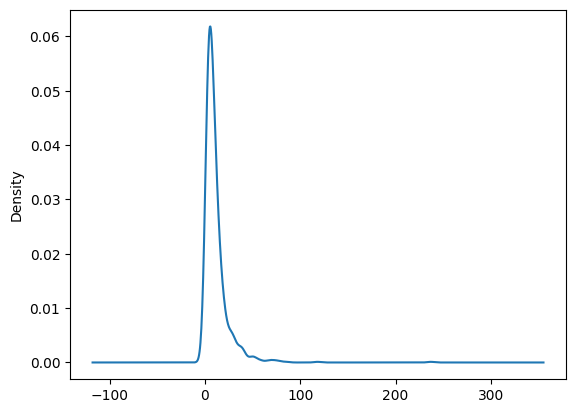

In [61]:
df['Fearure 1'].plot(kind = 'kde')

In [62]:
data,_ = st.boxcox(df['Fearure 1'])

<Axes: ylabel='Density'>

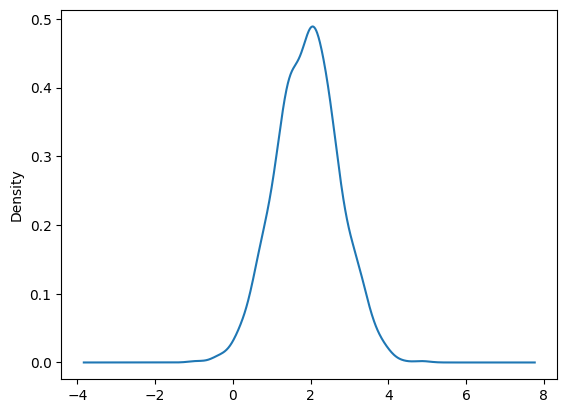

In [63]:
pd.Series(data).plot(kind = 'kde')

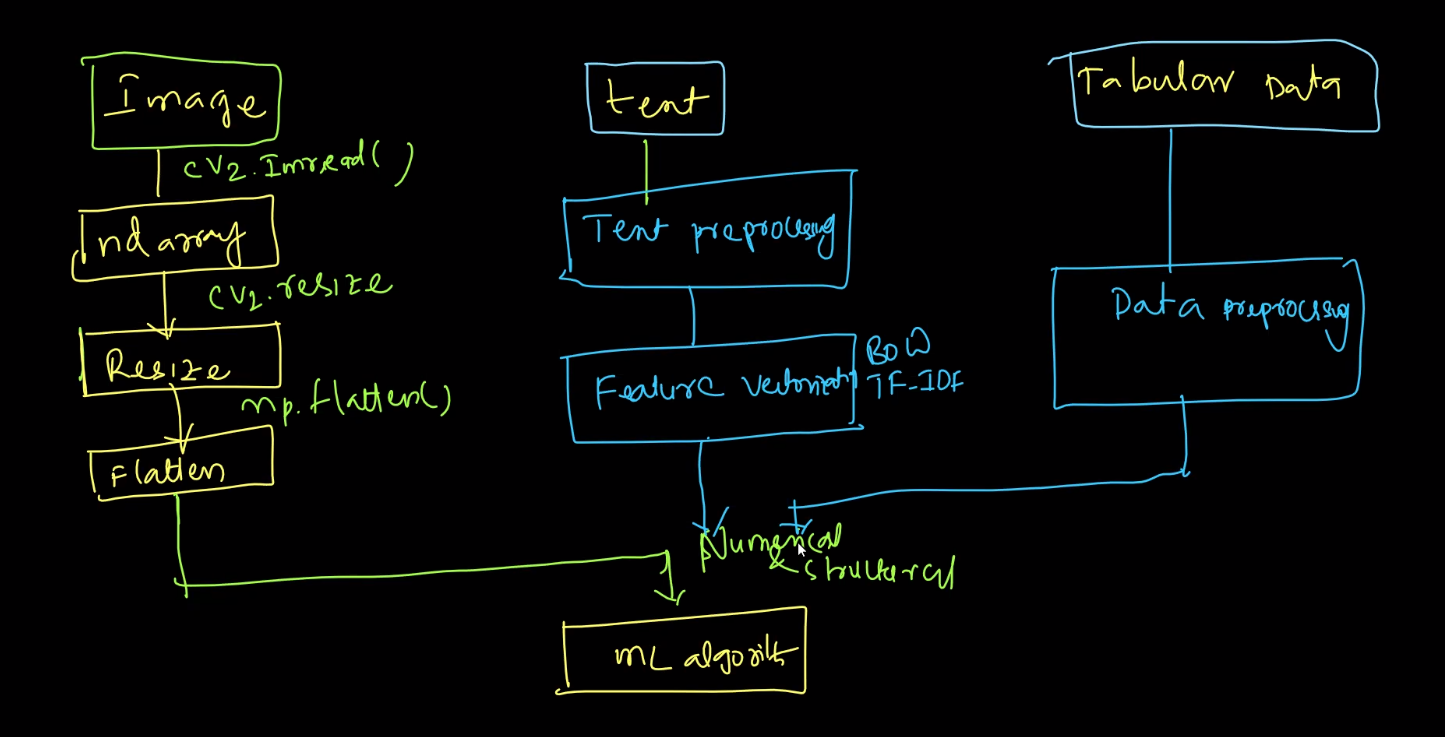

# Type Casting
- Transforming one data type to anaother data type.
- **why?**
  - Type Correction
  - Memory Optimization
- **astype()**